In [78]:
import pandas as pd

In [79]:
all_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 2 to 164
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   num_classes                 15 non-null     float64
 1   lr                          46 non-null     float64
 2   init_filters                15 non-null     float64
 3   kernel_size                 15 non-null     float64
 4   stride                      19 non-null     float64
 5   num_fc_units                15 non-null     float64
 6   optimizer                   61 non-null     object 
 7   loss_criterion              61 non-null     object 
 8   num_epochs                  61 non-null     float64
 9   batch_size                  61 non-null     float64
 10  Training Accuracy           61 non-null     float64
 11  Validation Accuracy         61 non-null     float64
 12  Test Accuracy               61 non-null     float64
 13  DATETIME                    61 non-null  

In [80]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

def retrieve_experiment_results(path):
    """Retrieve experiment results from an Excel file and calculate classification metrics."""
    try:
        # Load the Excel file from the specified sheet
        data = pd.read_excel(path, sheet_name='Results')
        print("Data loaded successfully.")
        
        # Calculate the metrics
        accuracy = accuracy_score(data['Actual Label'], data['Prediction'])
        report = classification_report(data['Actual Label'], data['Prediction'], target_names=data['Actual Label'].unique())
        
        print(f"Accuracy: {accuracy:.2f}")
        print("Classification Report:")
        print(report)
        
        return data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


In [81]:
old_results = pd.read_excel("reports\Archive\RESULTS.xlsx")

In [82]:
old_results = old_results.dropna(subset=['init_filters'])


In [83]:
old_results['model']='Baseline3DCNN'

In [84]:
all_results = pd.read_excel("reports/RESULTS.xlsx")

In [85]:
all_results['model']='VGG3D'

In [86]:
all_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   optimizer            93 non-null     object 
 1   lr                   93 non-null     float64
 2   loss_criterion       93 non-null     object 
 3   num_epochs           93 non-null     int64  
 4   batch_size           93 non-null     int64  
 5   patience             93 non-null     int64  
 6   Description          93 non-null     object 
 7   image_type           93 non-null     object 
 8   Training Accuracy    93 non-null     float64
 9   Validation Accuracy  93 non-null     float64
 10  Test Accuracy        93 non-null     float64
 11  DATETIME             93 non-null     object 
 12  weight_decay         46 non-null     float64
 13  momentum             46 non-null     float64
 14  model                93 non-null     object 
 15  sample_size          1 non-null      float

In [87]:
import pandas as pd

# Assuming old_results and all_results are your DataFrames

# Concatenate DataFrames vertically
all_results = pd.concat([old_results, all_results], ignore_index=True, sort=False)

# Display the result
print(all_results)


     num_classes    lr  init_filters  kernel_size  stride  num_fc_units  \
0            2.0   NaN          32.0          3.0     2.0         128.0   
1            2.0   NaN          32.0          3.0     2.0         128.0   
2            2.0   NaN          32.0          3.0     2.0         128.0   
3            2.0   NaN          32.0          3.0     2.0         128.0   
4            2.0   NaN         128.0          3.0     2.0         128.0   
..           ...   ...           ...          ...     ...           ...   
163          NaN  0.05           NaN          NaN     NaN           NaN   
164          NaN  0.10           NaN          NaN     NaN           NaN   
165          NaN  0.05           NaN          NaN     NaN           NaN   
166          NaN  0.10           NaN          NaN     NaN           NaN   
167          NaN  0.05           NaN          NaN     NaN           NaN   

    optimizer     loss_criterion  num_epochs  batch_size  ...  \
0        Adam  BCEWithLogitsLoss  

In [88]:
import pandas as pd



# Calculate the weighted average
all_results['Test & Validation Accuracy'] = (all_results['Validation Accuracy'] + 2 * all_results['Test Accuracy']) / 3

# Display the DataFrame to verify the new column
print(all_results[['Validation Accuracy', 'Test Accuracy', 'Test & Validation Accuracy']])


     Validation Accuracy  Test Accuracy  Test & Validation Accuracy
0              50.000000      50.000000                   50.000000
1              50.000000      50.000000                   50.000000
2              57.692308      53.846154                   55.128205
3              50.000000      50.000000                   50.000000
4              50.000000      50.000000                   50.000000
..                   ...            ...                         ...
163            30.000000      30.000000                   30.000000
164            60.000000      56.666667                   57.777778
165            40.000000      40.000000                   40.000000
166            40.000000      46.666667                   44.444444
167            40.000000      46.666667                   44.444444

[168 rows x 3 columns]


In [89]:
# Fill NaN values in 'image_type' with 'MRI_PET'
all_results['image_type'] = all_results['image_type'].fillna('MRI_PET')

In [90]:
all_results['image_type'].unique()

array(['MRI_PET', 'MRI', 'PET', 'Resampled Images(Co-registered PET)',
       'Resampled Images_fused',
       'Resampled Images(Spatial Normalization)',
       'Resampled Images(Masked PET)', 'Fused Images',
       'Co-registered PET', 'Masked PET', 'Spatial Normalization',
       'Fused Images (RESAMPLED TO PET)', 'Original PET (OLD)'],
      dtype=object)

In [91]:
import pandas as pd

# Assuming all_results is your DataFrame

# Define the mapping dictionary for image types
mapping_dict = {
    'Resampled Images_fused': 'Fusion(110x110x110)',
    'Resampled Images(Co-registered PET)': 'Co-registered PET(110x110x110)',
    'Resampled Images(Spatial Normalization)': 'MRI Spatially normalized(110x110x110)',
    'Resampled Images(Masked PET)': 'Masked PET(110x110x110)',
    'PET' : 'Masked PET(193x229x193)', 'MRI_PET' : 'Fusion(193x229x193)', 'Fused Images': 'Fusion(193x229x193)',
    'Original PET (OLD)' : 'Original PET(160x160x96)', 'Fused Images (RESAMPLED TO PET)' : 'Fusion(160x160x96)'
}


# Define the mapping dictionary for modality
modality_mapping_dict = {
    'Resampled Images_fused': 'Fusion',
    'Resampled Images(Co-registered PET)': 'PET',
    'Resampled Images(Spatial Normalization)': 'MRI',
    'Resampled Images(Masked PET)': 'PET',
    'PET': 'PET',
    'MRI_PET': 'Fusion',
    'Fused Images': 'Fusion',
    'Original PET (OLD)': 'PET',
    'Fused Images (RESAMPLED TO PET)': 'Fusion'
}


In [92]:
import pandas as pd

# Create a mask where sample_size is NaN in old_results
mask = pd.isna(all_results['sample_size'])

# Apply this mask to all_results if indices are aligned
all_results = all_results.loc[mask]

# Filter the DataFrame to keep only rows where both 'Test Accuracy' and 'Test & Validation Accuracy' are greater than 50%
all_results = all_results.loc[(all_results['Test & Validation Accuracy'] > 50)]



In [93]:
import os
import pandas as pd
from sklearn.metrics import recall_score

# Assuming all_results is your DataFrame
# Example: all_results = pd.read_csv('path_to_your_csv_file.csv')

def calculate_recall_for_mci(file_path):
    try:
        # Read the "Results" sheet from the Excel file
        df_results = pd.read_excel(file_path, sheet_name='Results')
        
        # Extract the actual labels and predictions
        actual_labels = df_results['Actual Label']
        predictions = df_results['Prediction']
        
        # Calculate recall for MCI cases
        recall = recall_score(actual_labels, predictions, pos_label='MCI')
        return recall
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

def add_recall_to_all_results(all_results):
    recall_list = []

    for datetime_value in all_results['DATETIME']:
        # Construct the file path
        file_path = os.path.join('reports', f'{datetime_value}_Experiment.xlsx')
        
        # Calculate recall for the current experiment file
        recall = calculate_recall_for_mci(file_path)
        recall_list.append(recall)
    
    # Add the recall values as a new column in the all_results DataFrame
    all_results['Recall_MCI'] = recall_list

    return all_results

# Assuming you have loaded the all_results DataFrame
# all_results = pd.read_csv('path_to_your_all_results_file.csv')

# Add the recall calculations to the DataFrame
all_results_with_recall = add_recall_to_all_results(all_results)

# Save the updated DataFrame to a new CSV file (optional)
# all_results_with_recall.to_csv('path_to_save_updated_all_results.csv', index=False)



all_results = all_results_with_recall.copy()

In [94]:
# Apply the mapping to create the 'Image type(dim)' column
all_results['Modality'] = all_results['image_type'].map(modality_mapping_dict)

all_results['Image_type(dim)'] = all_results['image_type'].map(mapping_dict)

# Extract the dimensions from the 'Image type(dim)' column
all_results['dimensions'] = all_results['Image_type(dim)'].str.extract(r'\((\d+x\d+x\d+)\)')



In [95]:
# Fill missing values in the 'dimensions' column with '193x229x193'
all_results['dimensions'].fillna('193x229x193', inplace=True)

C:\Users\Micha\AppData\Local\Temp\ipykernel_74548\2084373574.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_results['dimensions'].fillna('193x229x193', inplace=True)


In [96]:
# Concatenate the columns
all_results['Combined'] = all_results['Image_type(dim)'] + '_' + all_results['model']

# Get the unique combinations
unique_combinations = all_results['Combined'].unique()

# Display the unique combinations
print(unique_combinations)

['Fusion(193x229x193)_Baseline3DCNN'
 'Masked PET(193x229x193)_Baseline3DCNN' 'Fusion(110x110x110)_VGG3D'
 'Masked PET(110x110x110)_VGG3D' 'Co-registered PET(110x110x110)_VGG3D'
 'MRI Spatially normalized(110x110x110)_VGG3D' 'Fusion(193x229x193)_VGG3D'
 nan 'Original PET(160x160x96)_VGG3D' 'Fusion(160x160x96)_VGG3D']


In [97]:
# Group by 'model', 'dimensions', and 'image_type' and calculate statistics for 'Test & Validation Accuracy'
grouped_stats = all_results.groupby(['model', 'dimensions', 'image_type']).agg(
    counts_accuracy=('Test & Validation Accuracy', 'size'),
    avg_accuracy=('Test & Validation Accuracy', 'mean'),
    min_accuracy=('Test & Validation Accuracy', 'min'),
    max_accuracy=('Test & Validation Accuracy', 'max'),
    median_accuracy=('Test & Validation Accuracy', 'median')
).reset_index()

# Merge with original DataFrame to get the DATETIME for max_accuracy
max_accuracy_dates = all_results.loc[all_results.groupby(['model', 'dimensions', 'image_type'])['Test & Validation Accuracy'].idxmax()][['model', 'dimensions', 'image_type', 'DATETIME', 'Recall_MCI']]
max_accuracy_dates = max_accuracy_dates.rename(columns={'DATETIME': 'max_accuracy_DATETIME', 'Recall_MCI': 'best_recall'})

# Merge these back with the grouped_stats DataFrame
grouped_stats = pd.merge(grouped_stats, max_accuracy_dates, on=['model', 'dimensions', 'image_type'], how='left')



In [98]:
grouped_stats.to_excel("grouped_stats.xlsx", index=False)

In [99]:
all_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 2 to 164
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   num_classes                 15 non-null     float64
 1   lr                          46 non-null     float64
 2   init_filters                15 non-null     float64
 3   kernel_size                 15 non-null     float64
 4   stride                      19 non-null     float64
 5   num_fc_units                15 non-null     float64
 6   optimizer                   61 non-null     object 
 7   loss_criterion              61 non-null     object 
 8   num_epochs                  61 non-null     float64
 9   batch_size                  61 non-null     float64
 10  Training Accuracy           61 non-null     float64
 11  Validation Accuracy         61 non-null     float64
 12  Test Accuracy               61 non-null     float64
 13  DATETIME                    61 non-null  

In [100]:
import pandas as pd

# Assuming 'all_results' is your DataFrame
# all_results = pd.read_csv('your_data_file.csv') # Uncomment and modify if you need to load the DataFrame from a file

# Get a DataFrame with unique combinations of 'model', 'dimensions', and 'image_type'
unique_combinations = all_results[['model', 'dimensions', 'Image_type(dim)']].drop_duplicates().reset_index(drop=True)

# Display the result
print(unique_combinations)


           model   dimensions                        Image_type(dim)
0  Baseline3DCNN  193x229x193                    Fusion(193x229x193)
1  Baseline3DCNN  193x229x193                Masked PET(193x229x193)
2          VGG3D  110x110x110                    Fusion(110x110x110)
3          VGG3D  110x110x110                Masked PET(110x110x110)
4          VGG3D  110x110x110         Co-registered PET(110x110x110)
5          VGG3D  110x110x110  MRI Spatially normalized(110x110x110)
6          VGG3D  193x229x193                    Fusion(193x229x193)
7          VGG3D  193x229x193                                    NaN
8          VGG3D   160x160x96               Original PET(160x160x96)
9          VGG3D   160x160x96                     Fusion(160x160x96)


In [101]:
unique_combinations.to_excel("temp.xlsx", index=False)

FILTERING

In [102]:
all_results['Combined'].unique()

array(['Fusion(193x229x193)_Baseline3DCNN',
       'Masked PET(193x229x193)_Baseline3DCNN',
       'Fusion(110x110x110)_VGG3D', 'Masked PET(110x110x110)_VGG3D',
       'Co-registered PET(110x110x110)_VGG3D',
       'MRI Spatially normalized(110x110x110)_VGG3D',
       'Fusion(193x229x193)_VGG3D', nan, 'Original PET(160x160x96)_VGG3D',
       'Fusion(160x160x96)_VGG3D'], dtype=object)

In [103]:
# Define the experiment mappings
experiment_mappings = {
    'Fusion(193x229x193)_Baseline3DCNN': 'Experiment 1',
    'Masked PET(193x229x193)_Baseline3DCNN': 'Experiment 1',
    'Fusion(110x110x110)_VGG3D': 'Experiment 4',
    'Masked PET(110x110x110)_VGG3D': 'Experiment 4',
    'Co-registered PET(110x110x110)_VGG3D': 'Experiment 4',
    'MRI Spatially normalized(110x110x110)_VGG3D': 'Experiment 4',
    'Fusion(193x229x193)_VGG3D': 'Experiment 6',
    'Original PET(160x160x96)_VGG3D': 'Experiment 5',
    'Fusion(160x160x96)_VGG3D': 'Experiment 5'
}

# Map the "Combined" column to the "Experiment" column
all_results['Experiment'] = all_results['Combined'].map(experiment_mappings)

# Print the DataFrame to verify
print(all_results)

     num_classes     lr  init_filters  kernel_size  stride  num_fc_units  \
2            2.0    NaN          32.0          3.0     2.0         128.0   
5            2.0    NaN         128.0          3.0     2.0         128.0   
10           2.0    NaN         128.0          3.0     2.0         128.0   
12           2.0    NaN         128.0          3.0     2.0         128.0   
17           2.0    NaN          32.0          3.0     2.0         128.0   
..           ...    ...           ...          ...     ...           ...   
156          NaN  0.005           NaN          NaN     NaN           NaN   
157          NaN  0.001           NaN          NaN     NaN           NaN   
159          NaN  0.001           NaN          NaN     NaN           NaN   
160          NaN  0.100           NaN          NaN     NaN           NaN   
164          NaN  0.100           NaN          NaN     NaN           NaN   

    optimizer     loss_criterion  num_epochs  batch_size  ...  After_balance  \
2      

In [104]:
# Getting the unique experiments
unique_experiments = all_results['Experiment'].dropna().unique()

# Setting a style for the plot to make it look more professional
sns.set(style="whitegrid")

# Loop through each unique experiment and create a scatter plot
for experiment in unique_experiments:
    plt.figure(figsize=(10, 6))  # Adjust the size of the plot as needed
    scatter_plot = sns.scatterplot(data=all_results[all_results['Experiment'] == experiment], 
                                   x='Test & Validation Accuracy', y='Recall_MCI', 
                                   hue='Modality', palette='deep', s=100)
    
    # Adding plot title and labels with appropriate font size
    plt.title(f'Scatter Plot of Test & Validation set by Modality for {experiment}', fontsize=16)
    plt.xlabel('Accuracy', fontsize=14)
    plt.ylabel('Recall of MCI', fontsize=14)
    
    # Enhancing the legend
    plt.legend(title='Modality', title_fontsize='13', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))
    
    # Ensuring both axes start from the same point and have the same length
    x_min = 50
    x_max = 75
    y_min = 0
    y_max = 1
    
    # Adding a margin of 5% to both axes
    x_margin = (x_max - x_min) * 0.05
    y_margin = (y_max - y_min) * 0.05
    
    plt.xlim(x_min - x_margin, x_max + x_margin)
    plt.ylim(y_min - y_margin, y_max + y_margin)
    
    # Make both axes have the same length
    plt.gca().set_aspect((x_max - x_min + 2 * x_margin) / (y_max - y_min + 2 * y_margin))
    
    # Optional: Remove the top and right spines for a cleaner look
    sns.despine()
    
    # Show the plot
    plt.show()

NameError: name 'sns' is not defined

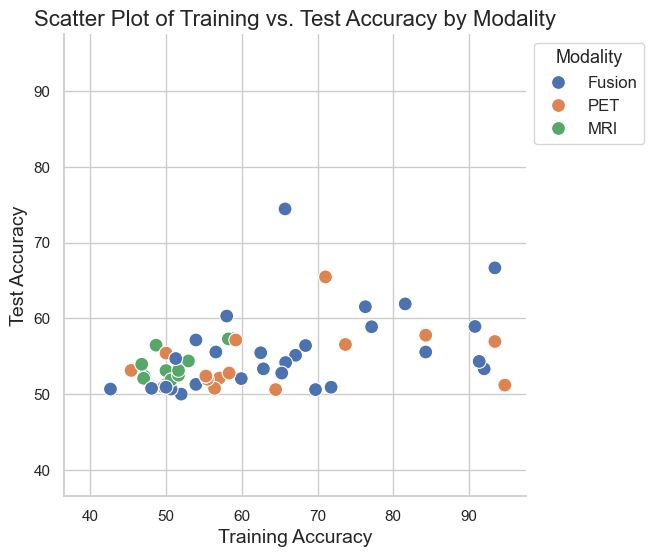

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting a style for the plot to make it look more professional
sns.set(style="whitegrid")

# Creating the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot as needed
scatter_plot = sns.scatterplot(data=all_results, x='Training Accuracy', y='Test & Validation Accuracy', 
                               hue='Modality', palette='deep', s=100)

# Adding plot title and labels with appropriate font size
plt.title('Scatter Plot of Training vs. Test Accuracy by Modality', fontsize=16)
plt.xlabel('Training Accuracy', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)

# Enhancing the legend
plt.legend(title='Modality', title_fontsize='13', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

# Ensuring both axes start from the same point and have the same length
min_accuracy = min(all_results['Test Accuracy'].min(), all_results['Training Accuracy'].min())
max_accuracy = max(all_results['Test Accuracy'].max(), all_results['Training Accuracy'].max())

# Adding a margin
margin = (max_accuracy - min_accuracy) * 0.05
plt.xlim(min_accuracy - margin, max_accuracy + margin)
plt.ylim(min_accuracy - margin, max_accuracy + margin)

# Make both axes have the same length
plt.gca().set_aspect('equal', adjustable='box')

# Optional: Remove the top and right spines for a cleaner look
sns.despine()

plt.show()


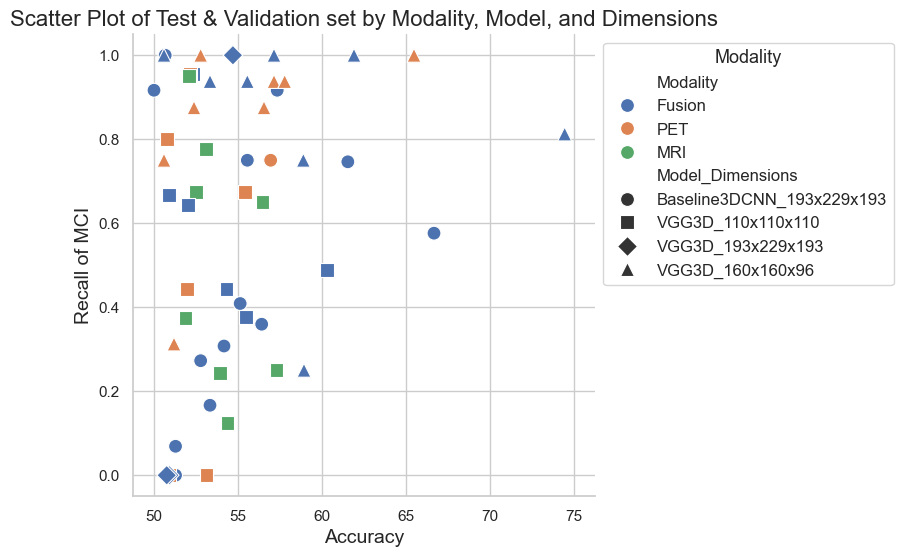

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'all_results' is a pandas DataFrame with columns 'Modality', 'Model', 'Dimensions',
# 'Test & Validation Accuracy', and 'Recall_MCI'

# Create a new column combining 'Model' and 'Dimensions' for markers
all_results['Model_Dimensions'] = all_results.apply(
    lambda row: f"{row['model']}_{row['dimensions']}", axis=1)

# Define a unique marker for each combination of Model and Dimensions
unique_combinations = all_results['Model_Dimensions'].unique()
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'P', '*', 'X', 'H']  # Add more markers if needed
marker_dict = {comb: markers[i % len(markers)] for i, comb in enumerate(unique_combinations)}

# Map the markers directly in the seaborn function
# Create a new column to indicate the combination of Model and Dimensions
all_results['Marker'] = all_results['Model_Dimensions'].map(marker_dict)

# Setting a style for the plot to make it look more professional
sns.set(style="whitegrid")

# Creating the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot as needed
scatter_plot = sns.scatterplot(data=all_results, x='Test & Validation Accuracy', y='Recall_MCI', 
                               hue='Modality', style='Model_Dimensions', markers=marker_dict, palette='deep', s=100)

# Adding plot title and labels with appropriate font size
plt.title('Scatter Plot of Test & Validation set by Modality, Model, and Dimensions', fontsize=16)
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Recall of MCI', fontsize=14)

# Enhancing the legend
plt.legend(title='Modality', title_fontsize='13', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

# Ensuring both axes start from the same point and have the same length
x_min = 50
x_max = 75
y_min = 0
y_max = 1

# Adding a margin of 5% to both axes
x_margin = (x_max - x_min) * 0.05
y_margin = (y_max - y_min) * 0.05

plt.xlim(x_min - x_margin, x_max + x_margin)
plt.ylim(y_min - y_margin, y_max + y_margin)

# Make both axes have the same length
plt.gca().set_aspect((x_max - x_min + 2 * x_margin) / (y_max - y_min + 2 * y_margin))

# Optional: Remove the top and right spines for a cleaner look
sns.despine()

plt.show()


### Overall distribution of Accuracy values

In [107]:
all_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 2 to 164
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   num_classes                 15 non-null     float64
 1   lr                          46 non-null     float64
 2   init_filters                15 non-null     float64
 3   kernel_size                 15 non-null     float64
 4   stride                      19 non-null     float64
 5   num_fc_units                15 non-null     float64
 6   optimizer                   61 non-null     object 
 7   loss_criterion              61 non-null     object 
 8   num_epochs                  61 non-null     float64
 9   batch_size                  61 non-null     float64
 10  Training Accuracy           61 non-null     float64
 11  Validation Accuracy         61 non-null     float64
 12  Test Accuracy               61 non-null     float64
 13  DATETIME                    61 non-null  

In [108]:
import pandas as pd

# Assuming 'all_results' is your DataFrame

# Grouping by 'model' and 'dimensions' and counting the number of results based on 'Test & Validation Accuracy'
grouped = all_results.groupby(['model', 'dimensions']).agg(
    num_results=('Test & Validation Accuracy', 'count')
).reset_index()

# Pivoting the table to get the best result for each Modality in 'Test & Validation Accuracy'
pivot = all_results.pivot_table(
    index=['model', 'dimensions'],
    columns='Modality',
    values='Test & Validation Accuracy',
    aggfunc='max'
).reset_index()

# Merging the two DataFrames
result = pd.merge(grouped, pivot, on=['model', 'dimensions'])

# Displaying the result
print(result)


           model   dimensions  num_results     Fusion        MRI        PET
0  Baseline3DCNN  193x229x193           15  66.666667        NaN  56.944444
1          VGG3D  110x110x110           21  60.303030  57.291667  55.416667
2          VGG3D   160x160x96           17  74.444444        NaN  65.476190
3          VGG3D  193x229x193            8  54.696970        NaN        NaN


In [109]:
result.to_excel("temp.xlsx", index=False)

In [110]:
import pandas as pd

# Assuming 'all_results' is your DataFrame

# Grouping by 'model' and 'dimensions' and counting the number of results based on 'Test & Validation Accuracy'
grouped = all_results.groupby(['model', 'dimensions']).agg(
    num_results=('Test & Validation Accuracy', 'count')
).reset_index()

# Defining a function to create the pivot table with multiple aggregations
def create_pivot_table(df, index, columns, values):
    return df.pivot_table(
        index=index,
        columns=columns,
        values=values,
        aggfunc=['max', 'min', 'mean', 'median']
    ).reset_index()

# Creating the pivot table for 'Test & Validation Accuracy'
pivot = create_pivot_table(all_results, ['model', 'dimensions'], 'Modality', 'Test & Validation Accuracy')

# Flattening the MultiIndex columns for better readability
pivot.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in pivot.columns.values]

# Merging the grouped and pivot tables
result = pd.merge(grouped, pivot, left_on=['model', 'dimensions'], right_on=['model_', 'dimensions_'])

# Dropping the duplicate columns after the merge
result = result.drop(columns=['model_', 'dimensions_'])

# Renaming columns for better readability
result.columns = [col.replace('_Test & Validation Accuracy', '') for col in result.columns]

# Displaying the result
print(result)


           model   dimensions  num_results  max_Fusion    max_MRI    max_PET  \
0  Baseline3DCNN  193x229x193           15   66.666667        NaN  56.944444   
1          VGG3D  110x110x110           21   60.303030  57.291667  55.416667   
2          VGG3D   160x160x96           17   74.444444        NaN  65.476190   
3          VGG3D  193x229x193            8   54.696970        NaN        NaN   

   min_Fusion  min_MRI    min_PET  mean_Fusion   mean_MRI   mean_PET  \
0   50.000000      NaN  56.944444    54.771978        NaN  56.944444   
1   50.909091   51.875  50.757576    54.229798  53.861532  52.383207   
2   50.595238      NaN  50.595238    58.849206        NaN  55.141093   
3   50.757576      NaN        NaN    52.121212        NaN        NaN   

   median_Fusion  median_MRI  median_PET  
0      53.750000         NaN   56.944444  
1      53.333333      53.125   52.045455  
2      58.015873         NaN   52.777778  
3      50.909091         NaN         NaN  


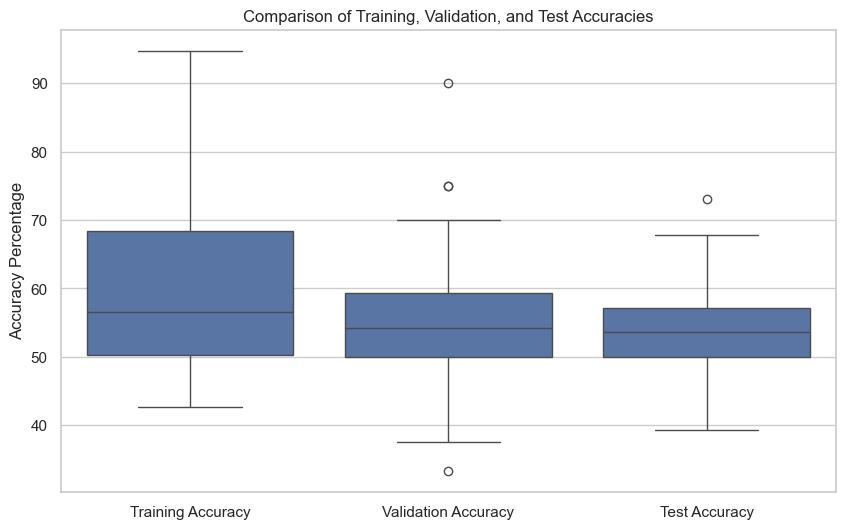

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'all_results' is already loaded as a pandas DataFrame

# Set the visual style for seaborn
sns.set(style="whitegrid")

# Create a new DataFrame that melts your original DataFrame down into a format where:
# - One column contains all accuracy types
# - One column contains the accuracy values
accuracy_data = pd.melt(all_results, id_vars=['optimizer', 'lr', 'loss_criterion', 'num_epochs', 'batch_size', 'patience', 'Description', 'image_type', 'DATETIME', 'weight_decay', 'momentum'],
                        value_vars=['Training Accuracy', 'Validation Accuracy', 'Test Accuracy'],
                        var_name='Accuracy Type', value_name='Accuracy')

# Create the boxplot
plt.figure(figsize=(10, 6))  # You can adjust the size to better fit your resolution
sns.boxplot(x='Accuracy Type', y='Accuracy', data=accuracy_data)

# Add titles and labels
plt.title('Comparison of Training, Validation, and Test Accuracies')
plt.xlabel('')
plt.ylabel('Accuracy Percentage')

# Show the plot
plt.show()


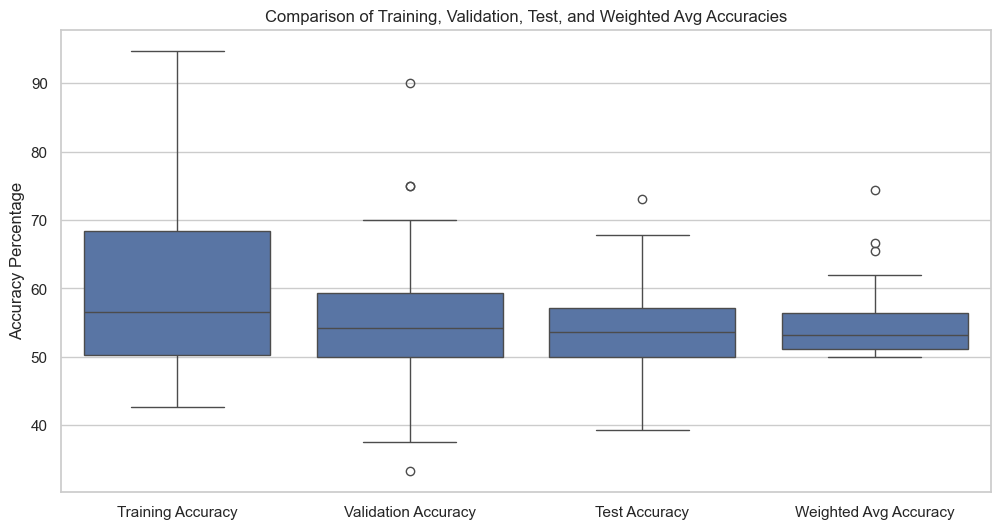

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'all_results' is already loaded as a pandas DataFrame

# Set the visual style for seaborn
sns.set(style="whitegrid")

# Create a new DataFrame that melts your original DataFrame down into a format where:
# - One column contains all accuracy types
# - One column contains the accuracy values
accuracy_data = pd.melt(all_results, id_vars=['optimizer', 'lr', 'loss_criterion', 'num_epochs', 'batch_size', 'patience', 'Description', 'image_type', 'DATETIME', 'weight_decay', 'momentum'],
                        value_vars=['Training Accuracy', 'Validation Accuracy', 'Test Accuracy'],
                        var_name='Accuracy Type', value_name='Accuracy')

# Calculate the weighted average of Test and Validation accuracies
# Assuming 'Test Accuracy' and 'Validation Accuracy' are the names in the 'all_results' DataFrame
test_data = all_results['Test Accuracy']
validation_data = all_results['Validation Accuracy']
weighted_avg = (2 * test_data + validation_data) / 3

# Create a new DataFrame for the weighted average
avg_data = pd.DataFrame({
    'optimizer': all_results['optimizer'],
    'lr': all_results['lr'],
    'loss_criterion': all_results['loss_criterion'],
    'num_epochs': all_results['num_epochs'],
    'batch_size': all_results['batch_size'],
    'patience': all_results['patience'],
    'Description': all_results['Description'],
    'image_type': all_results['image_type'],
    'DATETIME': all_results['DATETIME'],
    'weight_decay': all_results['weight_decay'],
    'momentum': all_results['momentum'],
    'Accuracy Type': 'Weighted Avg Accuracy',
    'Accuracy': weighted_avg
})

# Append this to the existing DataFrame
accuracy_data = pd.concat([accuracy_data, avg_data], ignore_index=True)

# Create the boxplot
plt.figure(figsize=(12, 6))  # Increased size for better readability
sns.boxplot(x='Accuracy Type', y='Accuracy', data=accuracy_data)

# Add titles and labels
plt.title('Comparison of Training, Validation, Test, and Weighted Avg Accuracies')
plt.xlabel('')
plt.ylabel('Accuracy Percentage')

# Show the plot
plt.show()


In [113]:
all_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 2 to 164
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   num_classes                 15 non-null     float64
 1   lr                          46 non-null     float64
 2   init_filters                15 non-null     float64
 3   kernel_size                 15 non-null     float64
 4   stride                      19 non-null     float64
 5   num_fc_units                15 non-null     float64
 6   optimizer                   61 non-null     object 
 7   loss_criterion              61 non-null     object 
 8   num_epochs                  61 non-null     float64
 9   batch_size                  61 non-null     float64
 10  Training Accuracy           61 non-null     float64
 11  Validation Accuracy         61 non-null     float64
 12  Test Accuracy               61 non-null     float64
 13  DATETIME                    61 non-null  

In [114]:
all_results = all_results.query('num_epochs >= 10')


In [115]:
df = all_results

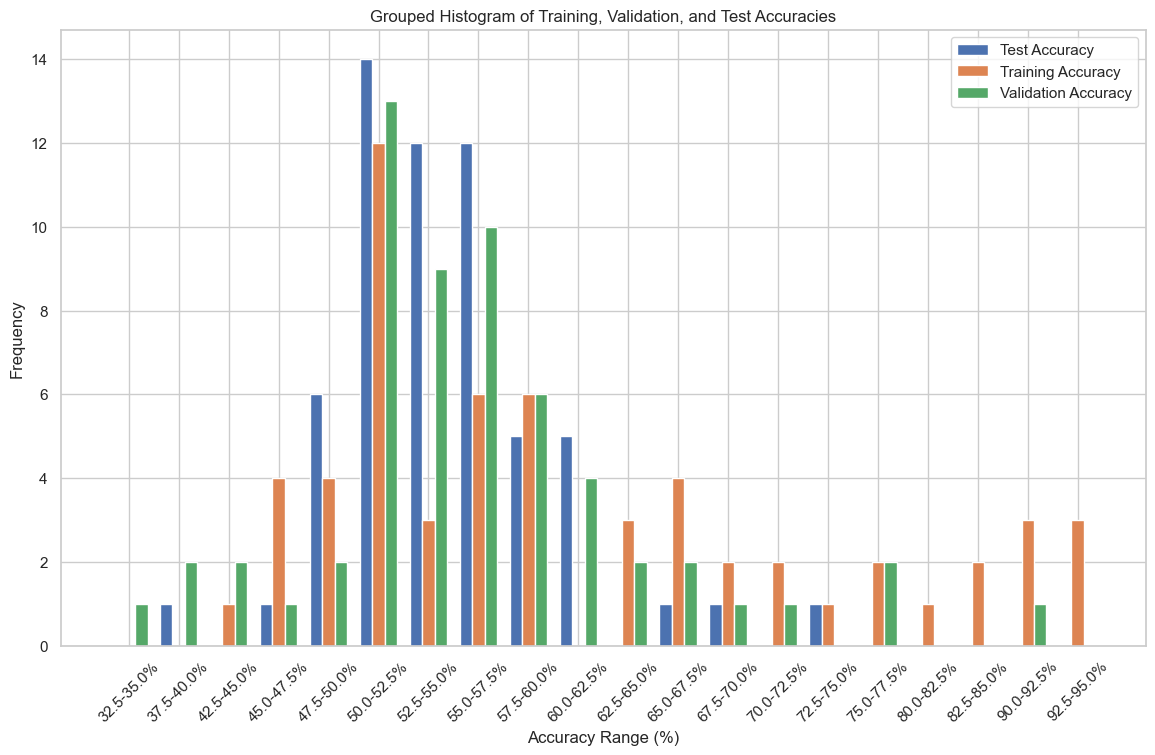

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Define the categorization function
def categorize_accuracy(val):
    return f"{int(val // 2.5) * 2.5}-{int(val // 2.5) * 2.5 + 2.5}%"

# Apply the categorization
for column in ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy']:
    df[column + ' Category'] = df[column].apply(categorize_accuracy)

# Create a plot data DataFrame
plot_data = pd.melt(df, id_vars=[], value_vars=['Training Accuracy Category', 'Validation Accuracy Category', 'Test Accuracy Category'],
                    var_name='Type', value_name='Accuracy Range')

# Organize data for plotting
grouped = plot_data.groupby(['Accuracy Range', 'Type']).size().unstack().fillna(0)

# Plot settings
fig, ax = plt.subplots(figsize=(14, 8))
width = 0.25  # width of bars
ind = np.arange(len(grouped))  # the x locations for the groups
shift = np.array([-width, 0, width])  # shifts for each type to group them

# Plotting each type
for i, column in enumerate(grouped.columns):
    ax.bar(ind + shift[i], grouped[column], width, label=column.replace(' Category', ''))

# Formatting plot
ax.set_xlabel('Accuracy Range (%)')
ax.set_ylabel('Frequency')
ax.set_title('Grouped Histogram of Training, Validation, and Test Accuracies')
ax.set_xticks(ind)
ax.set_xticklabels(grouped.index, rotation=45)
ax.legend()

plt.show()

In [117]:
# Display unique values and their counts for the specified columns
columns_of_interest = ['optimizer', 'lr', 'loss_criterion', 'num_epochs', 'batch_size', 'weight_decay', 'image_type']

# Iterate over the list of columns and print the unique values and their counts
for column in columns_of_interest:
    print(f"Unique values and counts for {column}:")
    print(all_results[column].value_counts(dropna=False))  # Include NaN values in the counts
    print("\n")


Unique values and counts for optimizer:
optimizer
Adam    30
SGD     29
Name: count, dtype: int64


Unique values and counts for lr:
lr
NaN       15
0.0050    14
0.0010    11
0.0100     7
0.1000     4
0.0001     3
0.0005     3
0.0500     2
Name: count, dtype: int64


Unique values and counts for loss_criterion:
loss_criterion
BCEWithLogits        36
CrossEntropyLoss     10
Cross-Entropy         8
BCEWithLogitsLoss     5
Name: count, dtype: int64


Unique values and counts for num_epochs:
num_epochs
200.0    32
20.0     12
10.0      6
400.0     6
150.0     3
Name: count, dtype: int64


Unique values and counts for batch_size:
batch_size
8.0     16
4.0     14
16.0     9
1.0      6
10.0     5
5.0      4
2.0      3
3.0      1
6.0      1
Name: count, dtype: int64


Unique values and counts for weight_decay:
weight_decay
NaN    40
0.0    19
Name: count, dtype: int64


Unique values and counts for image_type:
image_type
MRI_PET                                    14
Resampled Images(Spatial No

In [118]:
# First, group by the parameters along with the image type and get the max test accuracy
grouped_data = all_results.groupby([
   'model', 'loss_criterion', 'optimizer', 'num_epochs', 'batch_size', 'lr', 'image_type'
])['Test Accuracy'].max().reset_index()

# Now, pivot this data to get image types as columns
pivot_table = grouped_data.pivot_table(
    values='Test Accuracy', 
    index=['model', 'loss_criterion', 'optimizer', 'num_epochs', 'batch_size', 'lr'], 
    columns='image_type', 
    aggfunc='max'
).reset_index()  # Reset the index to turn the groupby columns into regular columns

# Optional: fill NaN values with a filler, e.g., 0 or an appropriate marker if no data is available for a combination
pivot_table_filled = pivot_table.fillna(0)

# Display the pivot table
print(pivot_table_filled)


image_type  model loss_criterion optimizer  num_epochs  batch_size      lr  \
0           VGG3D  BCEWithLogits      Adam        20.0         2.0  0.0100   
1           VGG3D  BCEWithLogits      Adam       200.0         4.0  0.0001   
2           VGG3D  BCEWithLogits      Adam       200.0         4.0  0.0005   
3           VGG3D  BCEWithLogits      Adam       200.0         4.0  0.0010   
4           VGG3D  BCEWithLogits      Adam       200.0         4.0  0.0050   
5           VGG3D  BCEWithLogits      Adam       200.0        10.0  0.0010   
6           VGG3D  BCEWithLogits      Adam       200.0        16.0  0.0010   
7           VGG3D  BCEWithLogits      Adam       200.0        16.0  0.0100   
8           VGG3D  BCEWithLogits      Adam       200.0        16.0  0.0500   
9           VGG3D  BCEWithLogits      Adam       200.0        16.0  0.1000   
10          VGG3D  BCEWithLogits       SGD       150.0         8.0  0.0050   
11          VGG3D  BCEWithLogits       SGD       200.0         4

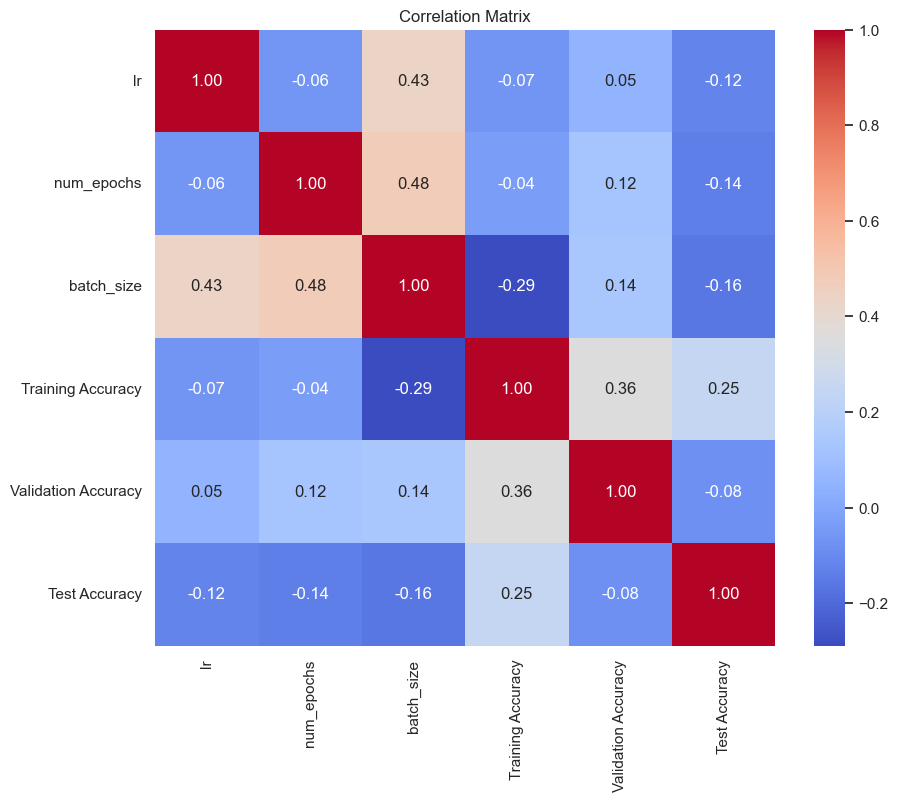

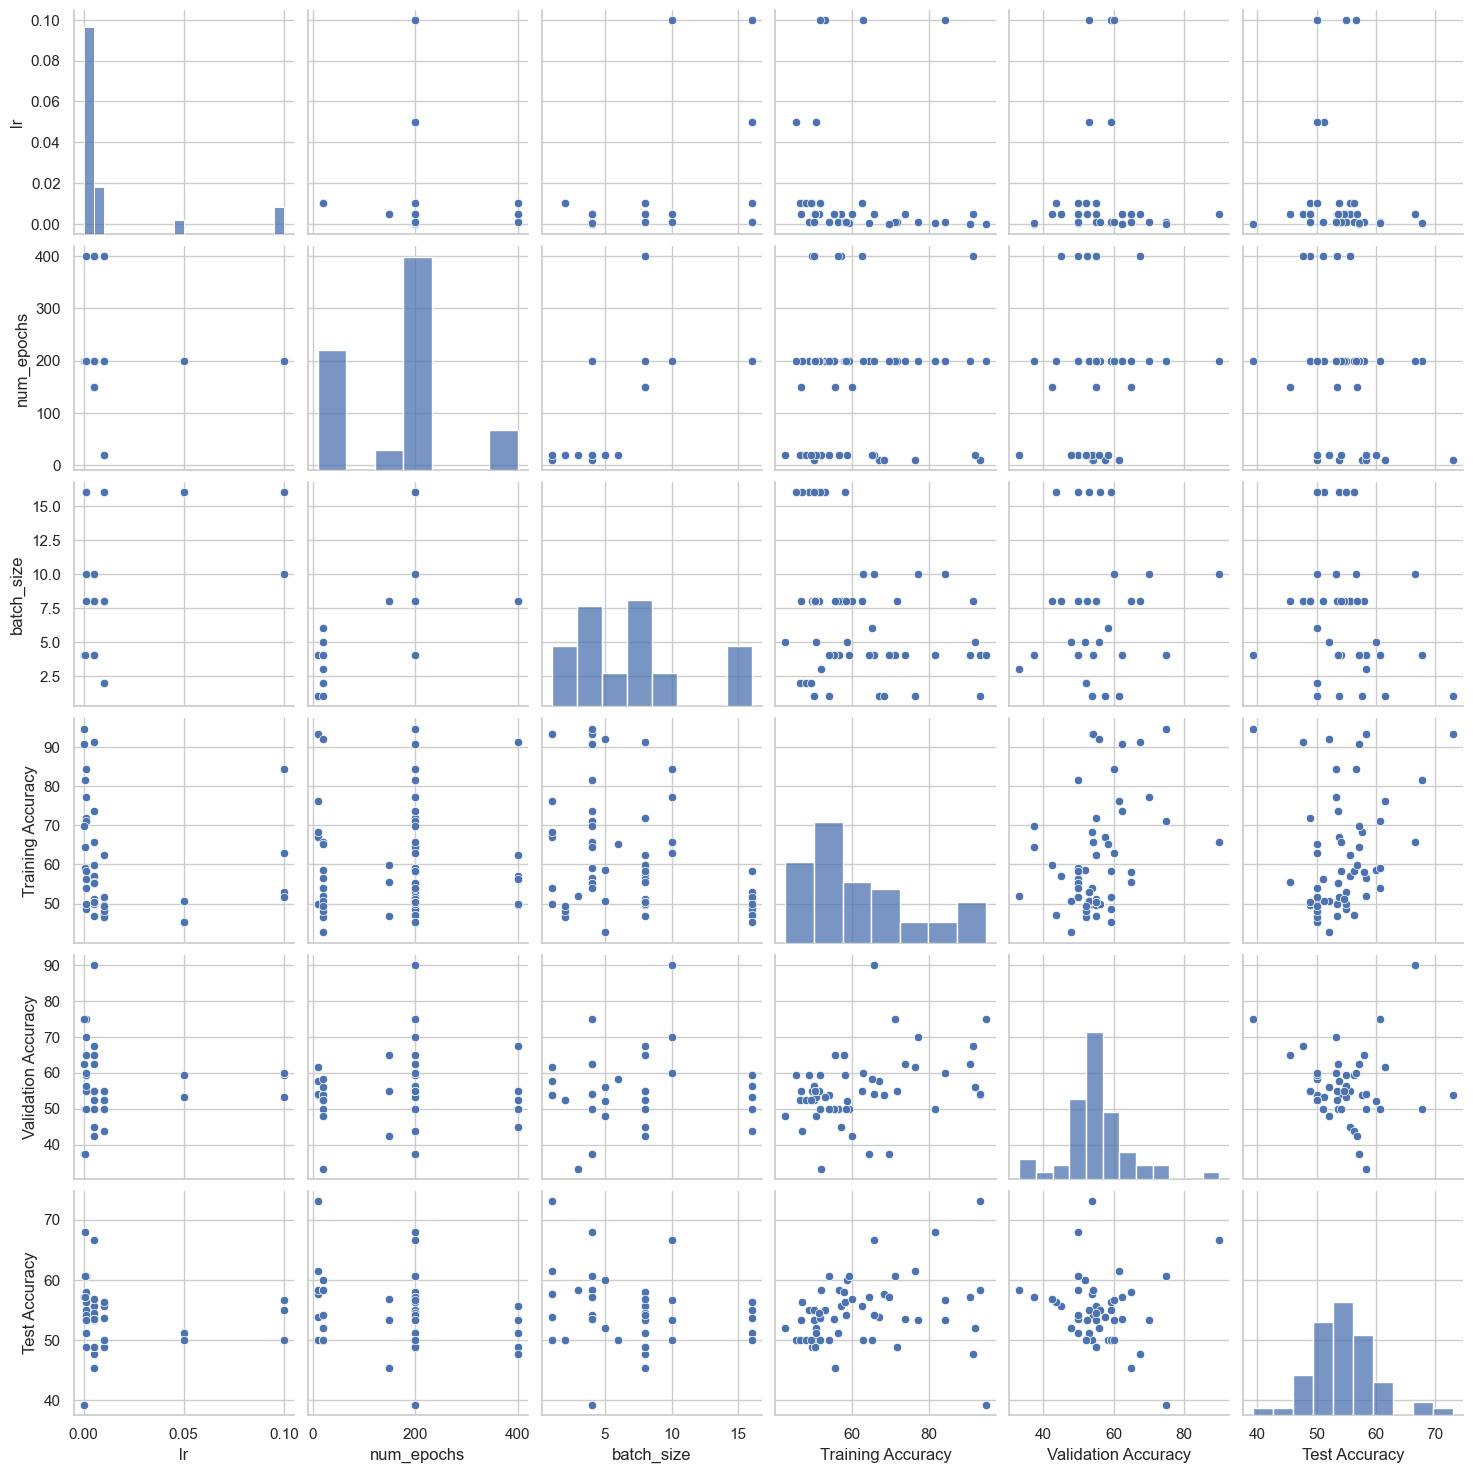

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation
numeric_columns = ['lr', 'num_epochs', 'batch_size', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']

# Calculate correlation matrix
corr_matrix = all_results[numeric_columns].corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairwise scatter plots
sns.pairplot(all_results[numeric_columns])
plt.show()


In [120]:
# Group by 'optimizer' and get mean accuracies
grouped_data = all_results.groupby('optimizer')['Training Accuracy', 'Validation Accuracy', 'Test Accuracy'].mean()
print(grouped_data)


ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
le_optimizer = LabelEncoder()
le_loss_criterion = LabelEncoder()

# Fit label encoder and return encoded labels
all_results['optimizer_encoded'] = le_optimizer.fit_transform(all_results['optimizer'])
all_results['loss_criterion_encoded'] = le_loss_criterion.fit_transform(all_results['loss_criterion'])

# Show the first few rows to verify the transformation
print(all_results[['optimizer', 'optimizer_encoded', 'loss_criterion', 'loss_criterion_encoded']].head())


   optimizer  optimizer_encoded     loss_criterion  loss_criterion_encoded
2       Adam                  0  BCEWithLogitsLoss                       1
5       Adam                  0  BCEWithLogitsLoss                       1
10      Adam                  0  BCEWithLogitsLoss                       1
12      Adam                  0  BCEWithLogitsLoss                       1
17      Adam                  0  BCEWithLogitsLoss                       1


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Prepare data (assuming all necessary preprocessing)
X = all_results[['lr', 'num_epochs', 'batch_size', 'optimizer_encoded', 'loss_criterion_encoded']]
y = all_results['Test Accuracy']

# Fit a decision tree
model = DecisionTreeRegressor(max_depth=5)
model.fit(X, y)

# Get feature importances
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
print(importances.sort_values(by='Importance', ascending=False))


ValueError: Input X contains NaN.
DecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Results from single experiment

In [ ]:

# Specify the path to the Excel file
file_path = r'reports\2024-05-13_20-53-19_Experiment.xlsx'

# Call the function with the specified path
experiment_data = retrieve_experiment_results(file_path)


Data loaded successfully.
Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

          CN       0.56      0.67      0.61        43
         MCI       0.61      0.49      0.54        45

    accuracy                           0.58        88
   macro avg       0.58      0.58      0.58        88
weighted avg       0.59      0.58      0.58        88



In [155]:
import pandas as pd

# Define the hyperparameters of interest
hyperparams = ['lr', 'init_filters', 'kernel_size', 'stride', 'num_fc_units', 'optimizer', 'loss_criterion', 'batch_size']

# Pivot table for Validation Accuracy
pivot_table = pd.pivot_table(all_results, values='Validation Accuracy', index=hyperparams, aggfunc='mean')
print(pivot_table)


Empty DataFrame
Columns: []
Index: []


C:\Users\Micha\AppData\Local\Temp\ipykernel_74548\1326796974.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(all_results, values='Validation Accuracy', index=hyperparams, aggfunc='mean')


In [124]:
grouped = all_results.groupby(hyperparams).agg({'Validation Accuracy': 'mean', 'Training Accuracy': 'mean', 'Test Accuracy': 'mean'}).reset_index()
print(grouped)


Empty DataFrame
Columns: [lr, init_filters, kernel_size, stride, num_fc_units, optimizer, loss_criterion, batch_size, Validation Accuracy, Training Accuracy, Test Accuracy]
Index: []


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


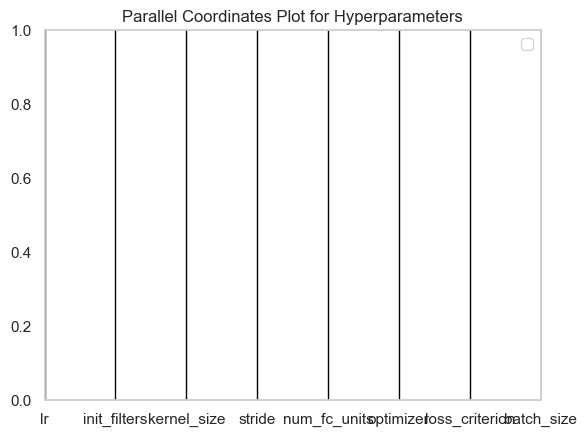

In [125]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Select relevant columns for parallel coordinates plot
plot_data = grouped[['lr', 'init_filters', 'kernel_size', 'stride', 'num_fc_units', 'optimizer', 'loss_criterion', 'batch_size', 'Validation Accuracy']]

parallel_coordinates(plot_data, class_column='Validation Accuracy', colormap='viridis')
plt.title('Parallel Coordinates Plot for Hyperparameters')
plt.show()


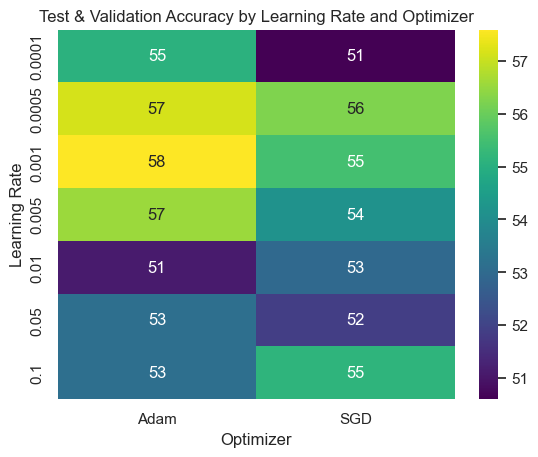

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example heatmap for 'lr' and 'optimizer'
heatmap_data = all_results.pivot_table(values='Test & Validation Accuracy', index='lr', columns='optimizer', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='viridis')

# Set axis labels
plt.xlabel('Optimizer')
plt.ylabel('Learning Rate')

# Set the title
plt.title('Test & Validation Accuracy by Learning Rate and Optimizer')

# Show the plot
plt.show()


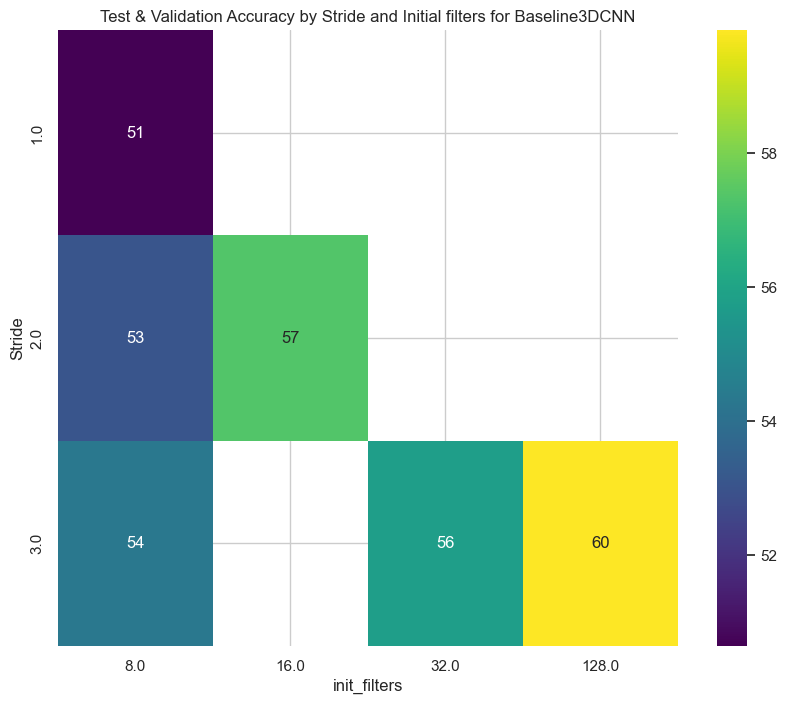

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for model = Baseline3DCNN
filtered_data = all_results[all_results['model'] == 'Baseline3DCNN']


# Heatmap for 'stride' and 'optimizer'
heatmap_data_stride = filtered_data.pivot_table(values='Test & Validation Accuracy', index='kernel_size', columns='init_filters', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_stride, annot=True, cmap='viridis')
plt.xlabel('init_filters')
plt.ylabel('Stride')
plt.title('Test & Validation Accuracy by Stride and Initial filters for Baseline3DCNN')
plt.show()


In [152]:
import pandas as pd
from scipy import stats

# Load your data if necessary
# all_results = pd.read_csv('your_data.csv')

# List of features to analyze
features = ['lr', 'init_filters', 'kernel_size', 'stride', 'num_fc_units', 'optimizer', 'loss_criterion', 'batch_size']

# Convert to 'category' if considering these as categorical for this analysis
categorical_features = ['init_filters', 'kernel_size', 'stride', 'num_fc_units', 'optimizer', 'loss_criterion', 'batch_size']
for feature in categorical_features:
    all_results[feature] = all_results[feature].astype('category')

# Dictionary to store ANOVA results
anova_results = {}

# Iterate over each model
for model in all_results['model'].unique():
    model_data = all_results[all_results['model'] == model]
    anova_results[model] = {}
    for feature in features:
        # We need to drop NA values and ensure there are at least two groups with data
        if model_data[feature].nunique() > 1:  # Check if there are at least two unique values
            groups = [group["Test & Validation Accuracy"].dropna().values for name, group in model_data.groupby(feature) if len(group["Test & Validation Accuracy"].dropna()) > 1]
            if len(groups) > 1:  # Only perform ANOVA if there are at least two groups
                f_val, p_val = stats.f_oneway(*groups)
                anova_results[model][feature] = (f_val, p_val)
            else:
                anova_results[model][feature] = (None, 'Insufficient groups with data')
        else:
            anova_results[model][feature] = (None, 'Not enough unique categories')

# Output the results
for model in anova_results:
    print(f"Model: {model}")
    for feature in anova_results[model]:
        result = anova_results[model][feature]
        if result[0] is not None:
            print(f"  Feature: {feature} - F-Statistic: {result[0]:.4f}, P-value: {result[1]:.4g}")
        else:
            print(f"  Feature: {feature} - {result[1]}")
    print("\n")


Model: Baseline3DCNN
  Feature: lr - Not enough unique categories
  Feature: init_filters - F-Statistic: 3.6602, P-value: 0.06047
  Feature: kernel_size - F-Statistic: 2.1922, P-value: 0.1544
  Feature: stride - Not enough unique categories
  Feature: num_fc_units - Not enough unique categories
  Feature: optimizer - Not enough unique categories
  Feature: loss_criterion - F-Statistic: 5.0732, P-value: 0.04222
  Feature: batch_size - F-Statistic: 0.9089, P-value: 0.4338


Model: VGG3D
  Feature: lr - F-Statistic: 0.8823, P-value: 0.5175
  Feature: init_filters - Not enough unique categories
  Feature: kernel_size - Not enough unique categories
  Feature: stride - Not enough unique categories
  Feature: num_fc_units - Not enough unique categories
  Feature: optimizer - F-Statistic: 0.1000, P-value: 0.7534
  Feature: loss_criterion - F-Statistic: 0.4910, P-value: 0.4873
  Feature: batch_size - F-Statistic: 3.8712, P-value: 0.00964




C:\Users\Micha\AppData\Local\Temp\ipykernel_74548\2308032101.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group["Test & Validation Accuracy"].dropna().values for name, group in model_data.groupby(feature) if len(group["Test & Validation Accuracy"].dropna()) > 1]


In [157]:
import pandas as pd
from scipy import stats

# Load your data if necessary
# all_results = pd.read_csv('your_data.csv')

# List of features to analyze
features = ['lr', 'init_filters', 'kernel_size', 'stride', 'num_fc_units', 'optimizer', 'loss_criterion', 'batch_size']

# Convert to 'category' if considering these as categorical for this analysis
categorical_features = ['init_filters', 'kernel_size', 'stride', 'num_fc_units', 'optimizer', 'loss_criterion', 'batch_size']
for feature in categorical_features:
    all_results[feature] = all_results[feature].astype('category')
all_results['model'] = all_results['model'].astype('category')
all_results['Modality'] = all_results['Modality'].astype('category')
all_results['dimensions'] = all_results['dimensions'].astype('category')  # Ensure dimensions is categorized
all_results['Experiment'] = all_results['Experiment'].astype('category')  # Ensure Experiment is also categorized

# Prepare to store results in a list for DataFrame conversion
results = []

# Iterate over each combination of model, modality, dimension, and experiment
for (model, modality, dimensions, experiment), data_group in all_results.groupby(['model', 'Modality', 'dimensions', 'Experiment']):
    for feature in features:
        # Ensure there are at least two groups with data
        if data_group[feature].nunique() > 1 and data_group[feature].notna().sum() > 1:  # Check if there are at least two unique values
            groups = [group["Test & Validation Accuracy"].dropna().values for name, group in data_group.groupby(feature) if group["Test & Validation Accuracy"].dropna().size > 1]
            if len(groups) > 1:  # Only perform ANOVA if there are at least two groups
                f_val, p_val = stats.f_oneway(*groups)
                results.append([model, modality, dimensions, experiment, feature, f_val, p_val])
        # Rows with insufficient data are not added to the results list

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Modality', 'Dimension', 'Experiment', 'Feature', 'F-Statistic', 'P-Value'])

# Display the DataFrame
print(results_df)


            Model Modality    Dimension    Experiment         Feature  \
0   Baseline3DCNN   Fusion  193x229x193  Experiment 1    init_filters   
1   Baseline3DCNN   Fusion  193x229x193  Experiment 1     kernel_size   
2   Baseline3DCNN   Fusion  193x229x193  Experiment 1  loss_criterion   
3   Baseline3DCNN   Fusion  193x229x193  Experiment 1      batch_size   
4           VGG3D   Fusion  110x110x110  Experiment 4              lr   
5           VGG3D   Fusion   160x160x96  Experiment 5              lr   
6           VGG3D   Fusion   160x160x96  Experiment 5       optimizer   
7           VGG3D   Fusion   160x160x96  Experiment 5      batch_size   
8           VGG3D      MRI  110x110x110  Experiment 4              lr   
9           VGG3D      MRI  110x110x110  Experiment 4       optimizer   
10          VGG3D      MRI  110x110x110  Experiment 4      batch_size   
11          VGG3D      PET  110x110x110  Experiment 4              lr   
12          VGG3D      PET  110x110x110  Experiment

C:\Users\Micha\AppData\Local\Temp\ipykernel_74548\605391119.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (model, modality, dimensions, experiment), data_group in all_results.groupby(['model', 'Modality', 'dimensions', 'Experiment']):
C:\Users\Micha\AppData\Local\Temp\ipykernel_74548\605391119.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group["Test & Validation Accuracy"].dropna().values for name, group in data_group.groupby(feature) if group["Test & Validation Accuracy"].dropna().size > 1]


In [158]:
results_df.to_excel("temp.xlsx", index=False)

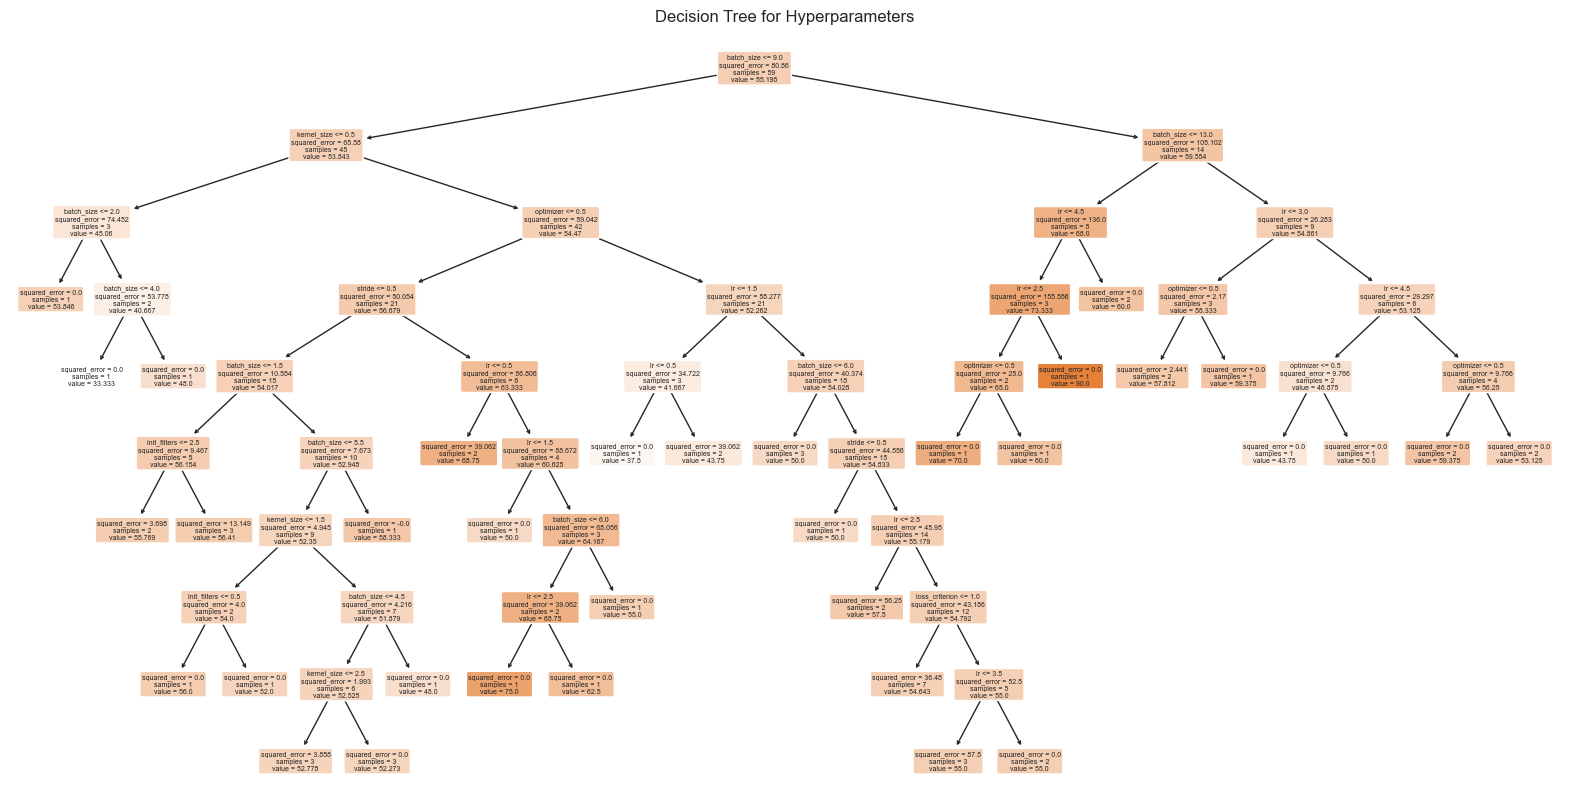

In [136]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Prepare the data
X = all_results[hyperparams].fillna('missing')  # Convert NaNs to a placeholder
y = all_results['Validation Accuracy']

# Convert categorical variables to numeric codes
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

# Train a decision tree regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=hyperparams, filled=True, rounded=True)
plt.title('Decision Tree for Hyperparameters')
plt.show()
